## Guidelines
Please complete the assignment inside this notebook. Make sure the code can be executed easily.

- For question 1 and 2, 
    - write production-ready code using OOP when relevant.
    - create simple unit tests for your code where applicable.
    - add comments and documentation strings for important methods. 
    - discuss your design choices and discuss the complexity (Big O notation) of your solutions, both memory wise and performance wise. Provide map visualization when relevant
    - Try to stick to the most popular scientific Python libraries.
    - Use the provided csv files.
- For question 2, use map vizualisastion
- For question 3, no code implementation is needed

## Input data for Q1 and Q2
You should have received three csv files. Each csv-file represents the locations where a person was stationary for a certain amount of time. 
The csv-files contain the following fields:

- Latitude: The latitude of the detected GPS coordinates Longitude: The longitude of the detected GPS coordinates
- Timestamp: The start time of the stationary in the following format:
    - YYYY = year
    - MM = month of year
    - dd = day of month
    - HH=hourofday
    - mm = minute of hour
    - Z = timezone offset
- Duration: The length of time the person was stationary (in milliseconds)
    
Questions 1 and 2 in this assignment are related to this data.

## Question 1: Data lookup
Create a method that generates a lookup table allowing us to effiently check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location (some noise is added to the longitude/latitude pairs). Data to be used are in the provided csv files.

In [1]:
pip install reverse_geocoder


     |████████████████████████████████| 2.3MB 6.6MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-cp36-none-any.whl size=2268090 sha256=1239d94a22374f5d4b71b3bbc3564f7babce345c92971118976d0c858207169b
  Stored in directory: /root/.cache/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


In [0]:
   # Import statements 

import numpy as np
import pandas as pd
import reverse_geocoder as rg 
#import unittest

In [0]:
   # Read input csv and create dataframe for each user. Provide location path correspondingly

person1= pd.read_csv("/content/person1.csv",sep=';')
person2= pd.read_csv("/content/person2.csv",sep=';')
person3= pd.read_csv("/content/person3.csv",sep=';')

In [0]:
    # Create additional column combining latitude and longitude for using as input for reverse geocoder

person1["lat-long"]=list(zip(person1.latitude,person1.longitude))
person2["lat-long"]=list(zip(person2.latitude,person2.longitude))
person3["lat-long"]=list(zip(person3.latitude,person3.longitude))

In [0]:
     # Create class person and declare methods 

class person:
  
     # Constructor of class person and initialise the corresponding persons dataframe
    
    def __init__(self,my_dataframe):
      self.my_dataframe=my_dataframe
      
     # Method for fetching the location details( Province, City and Country ) based on 
     # the latitude and longitude using the reverse geocoder pacakge. The result from 
     # geocoder api would be a dictionary of location specific details, which is further
     # traversed to fetch individual values using the prov_city_count function. The obtained 
     # location parameters for each lat,long is further appened to individual lists. 
      
    def fetch_province_city_country(self):
      provincefinal,cityfinal,countryfinal=[],[],[]
      for i in range (len(self.my_dataframe['lat-long'])):
          result = rg.search(self.my_dataframe["lat-long"][i]) 
          province,city,country=self.prov_city_count(result)    
          provincefinal.extend(province)
          cityfinal.extend(city)
          countryfinal.extend(country)
      self.append_prov_city_count(provincefinal,cityfinal,countryfinal)
      
     # Fetch location parameters ,[Province-name, City-admin1 and Country-cc} for each latitude
     # and longitude values as received from the reverse geocoder reponse
    
    def prov_city_count(self,result):
      province,city,country=[],[],[]
      for j in result: 
          province.append(j['name'])
          city.append(j['admin1'])
          country.append(j['cc'])
      return(province,city,country) 
    
     # The returned list of parameters are updated as new columns to the repective input users dataframe
          
    def append_prov_city_count(self,provincefinal,cityfinal,countryfinal):
          self.my_dataframe['province']=provincefinal
          self.my_dataframe['city']=cityfinal
          self.my_dataframe['country']=countryfinal
             
     # Function to create and display the lookup table as dictionary of country -> 'province,city' values for each user.
     # The output will display both dataframe and dictionary grouped by country. Province and city combination for
     # each user location is displayed. First column is provinceand column header being countries. 
     #  AR-Argentina, BE- Belgium NL- Netherlands
              
    def lookup_dictionary(self):
          person_lookup=self.my_dataframe.groupby('country').apply(lambda x: dict(zip(x['province'],x['city']))).to_dict()
          person_location=pd.DataFrame.from_dict(person_lookup)
          print(person_location)
          # Fetching the name of the dataframe for display purpose
          name=[x for x in globals() if globals()[x] is self.my_dataframe][0]
          print(name,person_lookup) 
        
   

In [0]:
# Main function to create 3 objects for each user and display their lookup table as a dictionary

if __name__ == '__main__':
  first_person=person(person1)
  first_person.fetch_province_city_country()
  first_person.lookup_dictionary()
  second_person=person(person2)
  second_person.fetch_province_city_country()
  second_person.lookup_dictionary()
  third_person=person(person3)
  third_person.fetch_province_city_country()
  third_person.lookup_dictionary()


In [0]:
#Testing the reverse geocoder prov_city_count function

def prov_city_count(result):
      province,city,country=[],[],[]
      for j in result: 
          province.append(j['name'])
          city.append(j['admin1'])
          country.append(j['cc'])
      return(province,city,country) 

result = rg.search(person2["lat-long"][30])
print("Before testing reverse geocode function location parameters")
print (result)
province,city,country=prov_city_count(result) 
print (province,city,country)
print(" After comparing the dictionary value and individual values for equality ")   


In [0]:
for i in range (len(person3['lat-long'])):
          result = rg.search(person3["lat-long"][i]) 
          print(result)

## Question 2: Home and work detection
The goal of this question, is to design and implement an algorithm that allows us to distinguish the likely home locations of a user from his likely work locations.

Note that a person might have multiple home and work locations, or might not have a work location at all. Also note that the data might be noise, incorrect and/or incomplete.

Discuss your choice of algorithms, rules, methods, distance measures, etc.

Data to be used are in the provided csv files.

In [0]:
!pip install geopandas
!pip install gmplot

In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame
import descartes
import gmplot 
import time
from datetime import datetime


In [0]:
    # Class derieved from parent person class
  
class person_loc_plot(person):
  
    def __init__(self,my_dataframe):
        self.my_dataframe=my_dataframe

    # Plot the lat, long points on the 'naturalearth_lowres' map data
    
    def plot_geodataframe(self):
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        world = world[world.name != 'Antarctica']
        world= world[world.name!='Australia']
        geometry = [Point(xy) for xy in zip(self.my_dataframe['longitude'], self.my_dataframe['latitude'])]
        crs = {'init': 'epsg:4326'}
        gdf = gpd.GeoDataFrame(self.my_dataframe, crs=crs, geometry=geometry)
        gdf.plot(ax=world.plot(figsize=(10,10)),marker='*', markersize=15,color='red')
        gdf.plot(marker='*', markersize=10,figsize=(10,10))
     
    
    # Prediction house work couldnt implemented fully
    def house_work(self):
        unique_country_list=self.my_dataframe['country'].unique().tolist()
        for val in unique_country_list:
              likelyhouse= max(self.my_dataframe['duration(ms)'])
              print(likelyhouse)

129017407
129017407
129017407


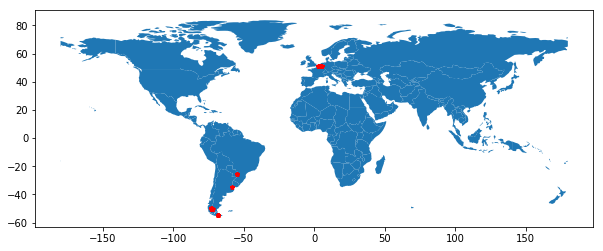

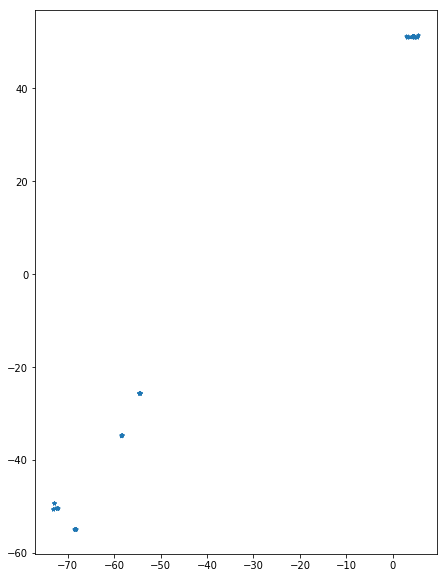

In [75]:

if __name__ == '__main__':
      first_person=person_loc_plot(person1)
      first_person.plot_geodataframe()
      first_person.house_work()
      second_person=person_loc_plot(person2)
      second_person.plot_geodataframe()
      second_person.house_work()
      third_person=person_loc_plot(person3)
      third_person.plot_geodataframe()
      third_person.house_work()

In [0]:
 # Sample testing the geodataframe plot with naturalearth_lowres
gdf = GeoDataFrame(person1, geometry=geometry) 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [0]:
# Trial 
from sklearn.cluster import DBSCAN

In [90]:
# Trial DBSCAN for clustering and rejectig outliers as not home and work - Not completed fuly
coords = person1.as_matrix(columns=['latitude', 'longitude'])
db = DBSCAN(eps=0.3, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


DBSCAN(algorithm='ball_tree', eps=0.3, leaf_size=30, metric='haversine',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

## Question 3: Design a data refresh system
Have a look at the Foursquare API, more specifically, the Venues search route at
https://developer.foursquare.com/docs/venues/search
Design a system that can receive a location fix (as a [latitude, longitude, accuracy] mobile GPS fix) and run
an algorithm to find the actual venue a user has visited using Foursquare as a venues-database. The design
should minimize the use of calls to the Foursquare API and include a way to refresh Foursquare results as
data retrieved from Foursquare can only be kept for a maximum of 30 days.

Keep in mind the definition of accuracy for a mobile GPS fix. Accuracy is represented in meter and means
that there is a 68% probability that a user is within a radius of that amount of meter around the provided
[latitude, longitude] coordinates. See Android docs:
https://developer.android.com/reference/android/location/Location.html#getAccuracy()

Additionally, visiting a place is highly unlikely to yield the exact same locations (again as [latitude, longitude]
pairs) on consecutive visits. Small variations are to be expected.

The goal of this assignment is to explain the software/systems design for this component. Please
provide one or more diagrams and accompanying text.
Note: The algorithm to map a location to a venue from a list of candidates can be considered as given.

For bonus points: provide your ideas on what this algorithm could look like.

In [0]:
# Attached word document (Sentiance_Nirmal_Datarefresh.doc) and design diagram datafresh_design.ppt